# Advanced linear regression with the Boston dataset

The Boston dataset is one of the best-known datasets for students of statistical learning. On the other hand, linear regression is one of the simplest approaches to supervised learning. However, the simplicity of linear regression should not mask the rich statistical information that can be obtained for suitable datasets using these methods. This notebook presents a detailed analysis of the Boston dataset using linear regression, covering from basic implementations to more advanced tools, and discussing in detail the statistical concepts and features of the dataset that can be illustrated with these techniques. We will also discuss the introduction of interactions and nonlinear functions of the predictors, and illustrate the bias-variance tradeoff.

This notebook uses the following libraries: numpy, pandas, seaborn, matplotlib, sklearn and statsmodels.

## 1. Imports and dataset

This section imports the necessary packages and loads the dataset from scikit-learn.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes = True)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import statsmodels.api as sm #To get additional statistical information
import statsmodels.formula.api as smf #To study interactions

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

The Boston dataset is a dictionary. We can check its keys, and explore the content in each of them, starting with the built-in description of the dataset:

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Reading this information allows us to understand the structure of the object provided by the load_boston function. Let us put this into a pandas dataframe, starting with the predictors (CRIM to LSTAT) and adding afterwards a column for the target variable (MEDV):

In [5]:
data = pd.DataFrame(boston['data'], columns = boston['feature_names'])
data['MEDV'] = boston['target']
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


Hence, we now have a pandas array containing all the information in the dataset (but for the description of the different variables). This is the data structure that we will use in the rest of the notebook.

## 2. Exploratory analysis

Let us dive into the data using one of the tools in Seaborn:

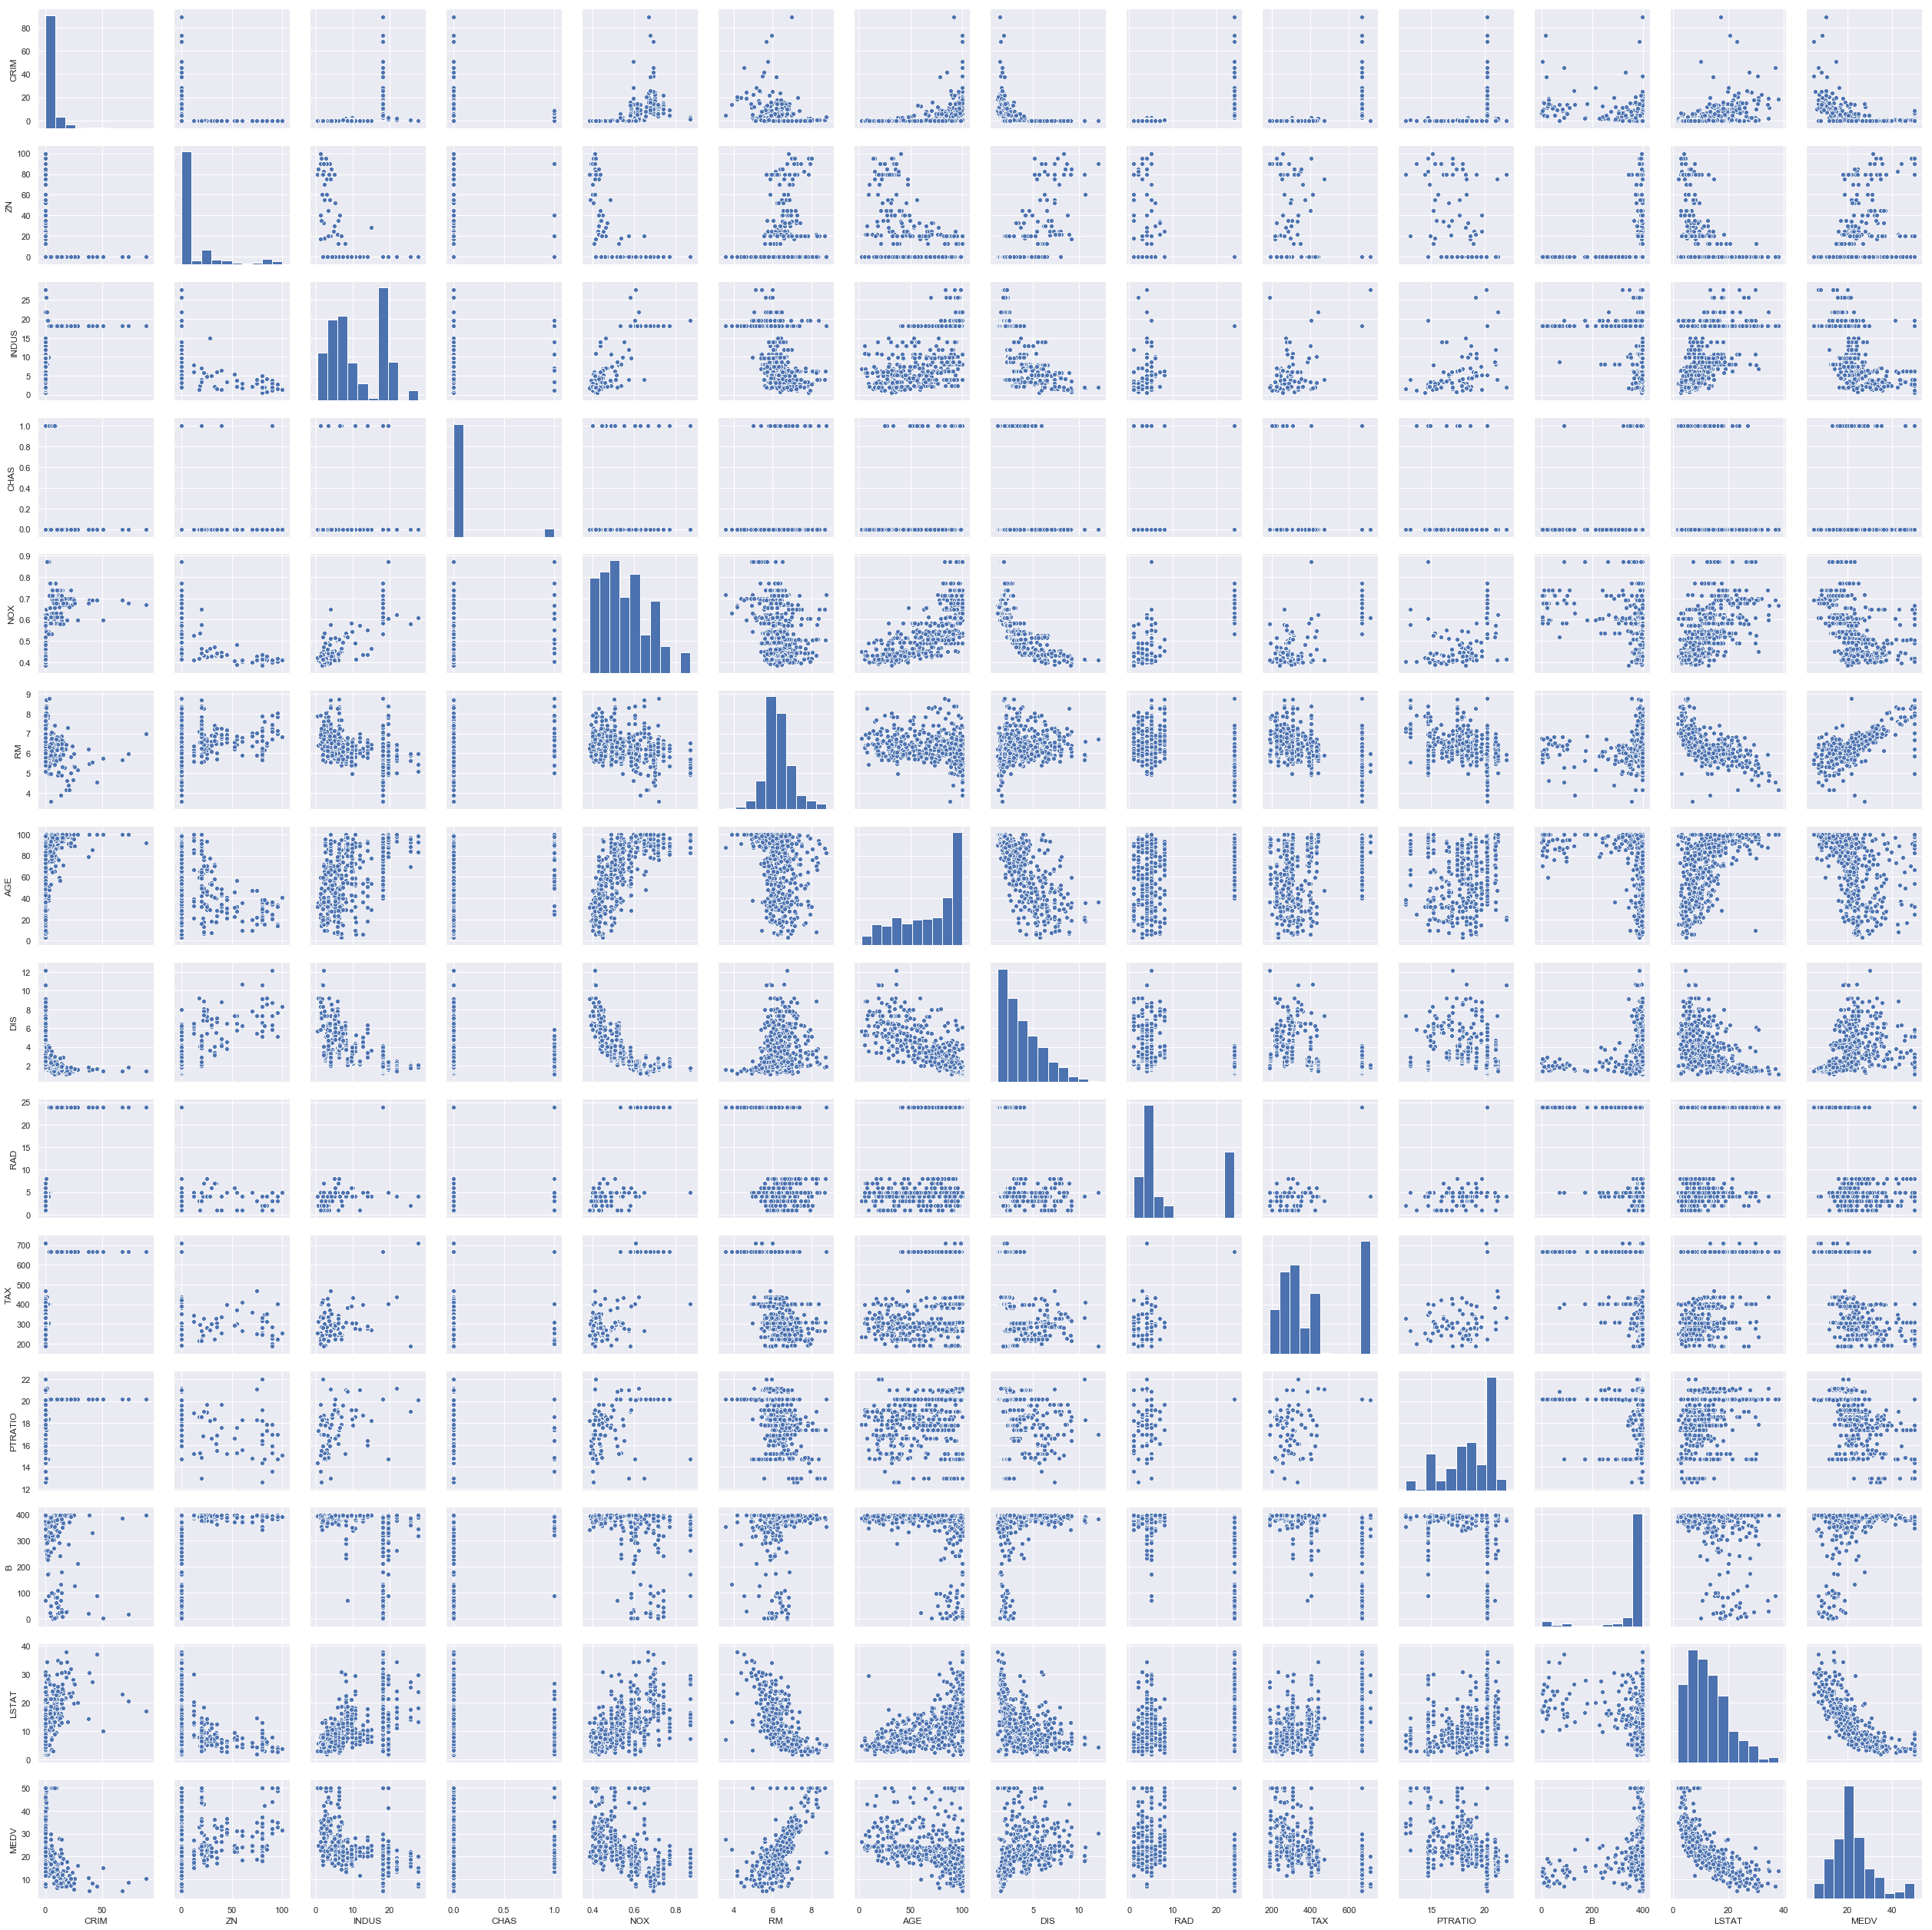

In [6]:
sns.pairplot(data)

The previous diagram provides some preliminary visual information about the relation between the different predictors and the target variable. In particular, the clearest correlations can be found for the RM and LSTAT variables. In the former case the correlation is such that increasing RM increases the target variable MEDV, while increasing LSTAT decreases the latter. We can confirm this visual information quantitatively:

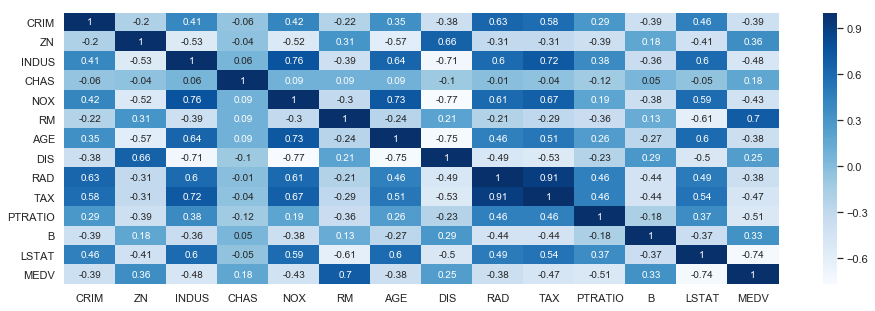

In [7]:
plt.figure(figsize = (16,5))
sns.heatmap(data.corr().round(2), annot = True, cmap="Blues")

We can check that the correlation coefficient between RM and MEDV is 0.7, while the correlation coefficient between LSTAT and MEDV is -0.74. We also see that some of the predictors (RAD and TAX, for instance) are strongly correlated. We may have to take this into account later in order to avoid collinearity issues.

Let us consider a last graph for this section, which allows us to inspect visually the distribution of the target variable:

Text(0.5, 1.0, 'Histogram of the target variable')

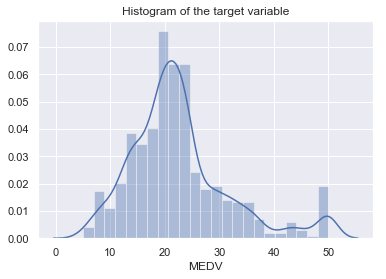

In [205]:
plot = sns.distplot(data['MEDV'])
plot.set_title('Histogram of the target variable')

We can conclude that the distribution of the target variable MEDV is reasonably close to a Gaussian distribution, but for some outliers that can be found for large values of the latter variable.

## 3. Linear regression with two predictors: performance on training data

As we have seen above, two of the predictors have a strong correlation with the target variable. Let us exploit this information in order to perform a first linear regression that focuses on these predictors. In this section, we use all the available data in the Boston dataset as training data, as we are interested just in getting some insights about the Boston dataset using linear regression. We will address the predictive power of linear regression later, splitting the dataset into train and test sets.

We can use the LinearRegression model available in scikit-learn:

In [10]:
x = data[['RM', 'LSTAT']]
y = data['MEDV']
lm = LinearRegression()
lm.fit(x, y)
pd.DataFrame(lm.coef_, x.columns, columns = ['Coefficient'])

,Coefficient
RM,5.094788
LSTAT,-0.642358


The performance of linear regression can be checked with the following functions:

In [11]:
y_fit = lm.predict(data[['RM', 'LSTAT']])
perf = np.array([metrics.mean_squared_error(y, y_fit), np.sqrt(metrics.mean_squared_error(y, y_fit)), metrics.explained_variance_score(y, y_fit)])
labels = np.array(['MSE', 'RMSE', 'R^2'])
pd.DataFrame(perf, labels, columns = ['Value'])

,Value
MSE,30.512469
RMSE,5.523809
R^2,0.638562


In particular, the value of R^2 tells us that slightly more than 60% of the variation in the target data (MEDV) is explained by the linear regression model with only the two predictors RM and LSTAT. This is certainly nice (given that we have a total of thirteen predictors), but we will discuss how to improve this later.

When dealing with linear regression, it is interesting to have access to additional information about the performance of the different algorithms. However, there are not built-in functions in sklearn that would allow us to access this information easily. But we can use statsmodels in order to do so; in the following, we will switch from sklearn to statsmodels in order to perform the fits:

In [12]:
mod = sm.OLS(y, sm.add_constant(x)).fit() #the sm.add_constant function allows for an intercept to be fitted
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Wed, 05 Jun 2019   Prob (F-statistic):          7.01e-112
Time:                        08:27:54   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Of course, this provides a double-check of the previously calculated coefficients. But our motivation for switching to statsmodels was obtaining a bunch of new information. 

For instance, we obtain the std error associated with the coefficients in the linear regression model. What can we deduce from this additional information? We can now deduce that a unit increase of RM leads to an increase in MEDV of **5.1 ± 0.9**. Hence, on average, an additional room in the property (keeping the conditions described by LSTAT fixed) shifts the median value of its price by $4000-6000 with a 95% confidence. We have to keep in mind that this estimation will change below as we introduce additional features in the linear regression model, such as additional predictors or nonlinear interactions, but we can come back to this value in order to check afterwards how good this prediction was.

We will use below additional information that is provided by the linear model in statsmodels. However, it is better to include additional features in order to illustrate the relevance of this additional information.

## 4. Linear regression with all the predictors: performance on training data

We now discuss the inclusion of the remaining predictors. We start including all the predictors, and then proceed to remove the less significative ones (following the "backward selection" procedure). For the moment we will implement this procedure manually; we will discuss afterwards how to use Lasso regression in order to obtain similar conclusions about the relative relevance of different predictors.

In [13]:
x = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']
mod = sm.OLS(y, sm.add_constant(x)).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 05 Jun 2019   Prob (F-statistic):          6.72e-135
Time:                        08:28:19   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Including all the thirteen predictors increases the value of R^2 to 0.741. However, this does not necessarily implies that all these predictors are equally relevant. Whether or not this is the case can be determined analyzing the p-values associated with each of these predictors:

In [14]:
mod.pvalues
pd.DataFrame(mod.pvalues.round(5), x.columns, columns = ['p-value'])

,p-value
CRIM,0.00109
ZN,0.00078
INDUS,0.73829
CHAS,0.00193
NOX,0.00000
RM,0.00000
AGE,0.95823
DIS,0.00000
RAD,0.00001
TAX,0.00111


We observe that the predictors INDUS and AGE have high p-values. This suggests that we can drop these variables without affecting the accuracy of the linear prediction (in other words, these predictors are redundant). We can confirm this running another fit in which these two predictors are excluded (we can do this in a two-step process in which we drop AGE first and then INDUS, without changing our conclusions):

In [15]:
x = data[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = data['MEDV']
mod = sm.OLS(y, sm.add_constant(x)).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 05 Jun 2019   Prob (F-statistic):          5.54e-137
Time:                        08:28:29   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In this new fit with a reduced number of predictors, we can check the corresponding p-values:

In [16]:
mod.pvalues
pd.DataFrame(mod.pvalues, x.columns, columns = ['p-value'])

,p-value
CRIM,1.010438e-03
ZN,7.542759e-04
CHAS,1.551469e-03
NOX,1.209413e-06
RM,2.889779e-19
DIS,6.837043e-15
RAD,2.996799e-06
TAX,5.214237e-04
PTRATIO,9.235063e-13
B,5.565743e-04


One can check that dropping other predictors decreases the value of R^2. Hence, we can keep all these predictors, even if not all of them have the same importance. In fact, just for completeness, we show a fit with the 5 more relevant predictors, and show that these account for more than 70% of the variation in the data. These 5 predictors have been selected following the "backward selection" procedure, namely removing at each step the predictor that is the last significant, and stopping the procedure when R^2 drops below 0.7:

In [17]:
x = data[['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]
y = data['MEDV']
mod = sm.OLS(y, sm.add_constant(x)).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     242.6
Date:                Wed, 05 Jun 2019   Prob (F-statistic):          3.67e-131
Time:                        08:28:39   Log-Likelihood:                -1528.7
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     500   BIC:                             3095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.4992      4.613      8.129      0.000      28.436      46.562
NOX          -17.9966      3.261     -5.519      0.000     -24.403     -11.590
RM             4.1633      0.412     10.104      0.000       3.354       4.973
DIS           -1.1847      0.168     -7.034      0.000      -1.516      -0.854
PTRATIO       -1.0458      0.114     -9.212      0.000      -1.269      -0.823
LSTAT         -0.5811      0.048    -12.122      0.000      -0.675      -0.487
==============================================================================
Omnibus:                      187.456   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              885.498
Skew:                           1.584   Prob(JB):                    5.21e-193
Kurtosis:                       8.654   Cond. No.                         545.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
mod.pvalues
pd.DataFrame(mod.pvalues, x.columns, columns = ['Value'])

,Value
NOX,5.488148e-08
RM,5.739143e-22
DIS,6.642179e-12
PTRATIO,8.800790e-19
LSTAT,7.923392e-30


In summary, linear regression suggests that the 5 more important predictors are, in order of importance:
#### LSTAT, RM, PTRATIO, DIS, NOX

Hence, we have successfully used linear regression in order to assess the predictors that have the largest effect on the target variable. That only 5 predictors are necessary in order to explain slightly more than 70% of the variability in the target variable makes this model easy to interpret.

## 5. Lasso regression

The selection of the most relevant predictors can be also achieved using Lasso regression. This would also provide a different analysis with which we can confront our conclusions in the previous section.

We use the sklearn implementation of Lasso regression in order to plot the behavior of the coefficients multiplying the different predictors with the parameter controlling the strength of the L1 penalty. In order to improve the interpretability of the plot, we have kept only the most interesting coefficients, removing the ones that vanish rapidly.

[Text(0, 0.5, 'Standardized coefficients'),
 Text(0.5, 0, '$\\lambda$ (penalty parameter)')]

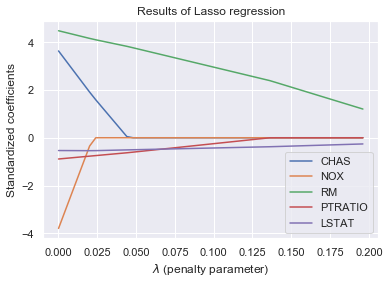

In [40]:
x = data[['CHAS', 'NOX', 'RM', 'PTRATIO', 'LSTAT']]
y = data['MEDV']
lasso = pd.DataFrame()
for penalty in 0.0001+0.004*np.arange(50):
    mod = Lasso(alpha = penalty, fit_intercept=True, normalize = True)
    mod.fit(x, y)
    lasso[penalty] = mod.coef_
    lasso.rename(index = {0: 'CHAS', 1:'NOX', 2:'RM', 3:'PTRATIO', 4:'LSTAT'}, inplace = True)
plot = lasso.T.plot(legend = True, title = 'Results of Lasso regression')
plot.set(xlabel = "$\lambda$ (penalty parameter)", ylabel="Standardized coefficients")

This plot provides quite interesting information. The first aspect we want to highlight is that the 5 predictors in the figure just above are not the same ones that we identified previously following the "backward selection" procedure: only 4 of them are the same, with DIS being replaced with CHAS. On the other hand, we still see that, when the penalty parameter grows, only RM and LSTAT remain nonzero, as we were certainly expecting.

We would need to decide now how to fix the best value of the penalty parameter. We will do this below, when discussing the performance of Lasso regresion on test sets.

## 6. Linear regression with quadratic interactions: performance on training data

One last ingredient that we want to discuss before addressing the performance of different implementations of linear regression on test sets is the inclusion of interactions. We start discussing only the predictors RM and LSTAT, and then move to include additional ones.

In [43]:
fit = smf.ols(formula = 'MEDV ~ RM + LSTAT + RM*LSTAT', data = data).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     476.9
Date:                Wed, 05 Jun 2019   Prob (F-statistic):          1.75e-146
Time:                        08:52:43   Log-Likelihood:                -1499.2
No. Observations:                 506   AIC:                             3006.
Df Residuals:                     502   BIC:                             3023.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.1245      3.342     -8.713      0.000     -35.692     -22.558
RM             9.7013      0.500     19.393      0.000       8.718      10.684
LSTAT          2.1940      0.206     10.666      0.000       1.790       2.598
RM:LSTAT      -0.4849      0.035    -14.018      0.000      -0.553      -0.417
==============================================================================
Omnibus:                      223.968   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2182.462
Skew:                           1.666   Prob(JB):                         0.00
Kurtosis:                      12.613   Cond. No.                     1.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
pd.DataFrame(fit.pvalues, ['RM','LSTAT', 'RM:LSTAT'], columns = ['Value'])

,Value
RM,6.037315e-63
LSTAT,4.460353e-24
RM:LSTAT,6.502527e-38


It is then clear (both from its p-value and the overall R^2, the latter increasing from 0.64 to 0.74) that the interaction term is statisfically significant.

We can follow a similar procedure with the 5 predictors that we have previously identified as the most important ones in the "backward selection" procedure:

In [59]:
fit = smf.ols(formula = 'MEDV ~ RM + NOX + DIS + PTRATIO + LSTAT + RM*(NOX + PTRATIO + LSTAT) + DIS*LSTAT + PTRATIO*LSTAT', data = data).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     220.9
Date:                Wed, 05 Jun 2019   Prob (F-statistic):          2.29e-175
Time:                        08:57:24   Log-Likelihood:                -1410.7
No. Observations:                 506   AIC:                             2843.
Df Residuals:                     495   BIC:                             2890.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -195.1966     21.613     -9.031      0.000    -237.661    -152.732
RM               36.5303      3.025     12.076      0.000      30.587      42.474
NOX              72.2160     18.615      3.880      0.000      35.642     108.789
DIS              -1.6711      0.205     -8.168      0.000      -2.073      -1.269
PTRATIO           7.7880      1.060      7.346      0.000       5.705       9.871
LSTAT             2.4273      0.418      5.804      0.000       1.606       3.249
RM:NOX          -13.5241      2.982     -4.536      0.000     -19.382      -7.666
RM:PTRATIO       -1.1656      0.143     -8.125      0.000      -1.447      -0.884
RM:LSTAT         -0.3001      0.039     -7.614      0.000      -0.378      -0.223
DIS:LSTAT         0.0806      0.019      4.180      0.000       0.043       0.118
PTRATIO:LSTAT    -0.0792      0.018     -4.408      0.000      -0.115      -0.044
==============================================================================
Omnibus:                      258.173   Durbin-Watson:                   1.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2748.151
Skew:                           1.971   Prob(JB):                         0.00
Kurtosis:                      13.715   Cond. No.                     4.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
pd.DataFrame(fit.pvalues, ['RM','NOX','DIS','PTRATIO','LSTAT','RM:NOX','RM:PTRATIO','RM:LSTAT','DIS:LSTAT','PTRATIO:LSTAT'], columns = ['Value'])

,Value
RM,1.315588e-29
NOX,1.188098e-04
DIS,2.637765e-15
PTRATIO,8.455591e-13
LSTAT,1.160392e-08
RM:NOX,7.210725e-06
RM:PTRATIO,3.595316e-15
RM:LSTAT,1.356158e-13
DIS:LSTAT,3.450393e-05
PTRATIO:LSTAT,1.282839e-05


We have only kept the interactions that are roughly as significative as the least significative single predictor (in the last iteration, NOX).

We can perform the same exercise but using the predictors suggested by the Lasso regression:

In [92]:
fit = smf.ols(formula = 'MEDV ~ RM + NOX + PTRATIO + LSTAT + RM*(NOX + CHAS + PTRATIO + LSTAT) + NOX*(LSTAT) + CHAS*(PTRATIO + LSTAT) + PTRATIO*LSTAT', data = data).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     179.7
Date:                Wed, 05 Jun 2019   Prob (F-statistic):          2.80e-177
Time:                        09:11:54   Log-Likelihood:                -1397.8
No. Observations:                 506   AIC:                             2824.
Df Residuals:                     492   BIC:                             2883.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -254.5101     21.915    -11.613      0.000    -297.569    -211.451
RM               41.3390      3.032     13.633      0.000      35.381      47.297
NOX             132.4126     22.358      5.922      0.000      88.483     176.342
PTRATIO           8.4880      1.034      8.205      0.000       6.455      10.520
LSTAT             4.2986      0.445      9.665      0.000       3.425       5.173
CHAS             17.7902     12.040      1.478      0.140      -5.866      41.446
RM:NOX          -17.7734      3.255     -5.460      0.000     -24.170     -11.377
RM:CHAS          -4.5186      1.283     -3.522      0.000      -7.039      -1.998
RM:PTRATIO       -1.2522      0.141     -8.860      0.000      -1.530      -0.975
RM:LSTAT         -0.3047      0.040     -7.603      0.000      -0.383      -0.226
NOX:LSTAT        -1.9397      0.303     -6.401      0.000      -2.535      -1.344
CHAS:PTRATIO      1.2475      0.344      3.630      0.000       0.572       1.923
CHAS:LSTAT       -0.6709      0.162     -4.132      0.000      -0.990      -0.352
PTRATIO:LSTAT    -0.0982      0.017     -5.922      0.000      -0.131      -0.066
==============================================================================
Omnibus:                      228.463   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2352.173
Skew:                           1.689   Prob(JB):                         0.00
Kurtosis:                      13.007   Cond. No.                     4.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
pd.DataFrame(fit.pvalues, ['RM','NOX','PTRATIO','LSTAT', 'RM:NOX', 'RM:CHAS', 'RM:PTRATIO','RM:LSTAT', 'NOX:LSTAT', 'CHAS:PTRATIO', 'CHAS:LSTAT', 'PTRATIO:LSTAT'], columns = ['Value'])

,Value
RM,3.821661e-31
NOX,1.022658e-08
PTRATIO,1.266404e-12
LSTAT,2.027025e-19
RM:NOX,3.308257e-07
RM:CHAS,7.776961e-02
RM:PTRATIO,2.785588e-14
RM:LSTAT,1.042863e-14
NOX:LSTAT,2.195976e-10
CHAS:PTRATIO,NaN


With the different choice of predictors, we see a slight improvement on the value of R^2. Interestingly, it is straightforward to check that the contribution of CHAS to this improvement comes mainly from the interaction terms between CHAS and other variables.

## 7. Linear regression with no interactions: performance on test data

We are now in position of discussing the performance of the different choices of predictors and interactions that we have discussed above. We will compare the performance on the training data against the performance in the test data, in order to understand their relative performance. 

We consider four situations: 2 and 5 predictors, with and without quadratic interactions. We will prepare a box plot for each of these four situations, where the statistics in each box plot will be associated with different splitting of the dataset into train and test sets. 

[Text(0, 0.5, '$R^2$')]

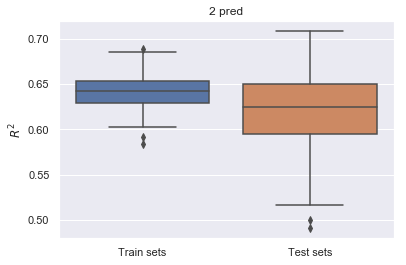

In [209]:
r2_train_2noint = []
r2_test_2noint = []
for i in range(100):
    data_train, data_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, random_state = i)
    fit = smf.ols(formula = 'MEDV ~ RM + LSTAT', data = data_train).fit()
    x_train = data_train[['RM', 'LSTAT']]
    x_test = data_test[['RM', 'LSTAT']]
    pred_train = fit.predict(x_train)
    pred_test = fit.predict(x_test)
    r2_train_2noint.append(metrics.r2_score(y_train, pred_train))
    r2_test_2noint.append(metrics.r2_score(y_test, pred_test))
d = {'Train sets': r2_train_2noint, 'Test sets': r2_test_2noint}
plot_data = pd.DataFrame(data = d)
plot = sns.boxplot(data = plot_data, orient = 'v')
plot.set_title('2 pred')
plot.set(ylabel="$R^2$")

[Text(0, 0.5, '$R^2$')]

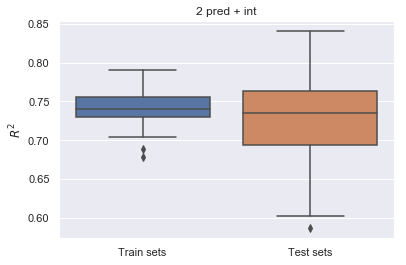

In [210]:
r2_train_2int = []
r2_test_2int = []
for i in range(100):
    data_train, data_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, random_state = i)
    fit = smf.ols(formula = 'MEDV ~ RM + LSTAT + RM:LSTAT', data = data_train).fit()
    x_train = data_train[['RM', 'LSTAT']]
    x_test = data_test[['RM', 'LSTAT']]
    pred_train = fit.predict(x_train)
    pred_test = fit.predict(x_test)
    r2_train_2int.append(metrics.r2_score(y_train, pred_train))
    r2_test_2int.append(metrics.r2_score(y_test, pred_test))
d = {'Train sets': r2_train_2int, 'Test sets': r2_test_2int}
plot_data = pd.DataFrame(data = d)
plot = sns.boxplot(data = plot_data, orient = 'v')
plot.set_title('2 pred + int')
plot.set(ylabel="$R^2$")

[Text(0, 0.5, '$R^2$')]

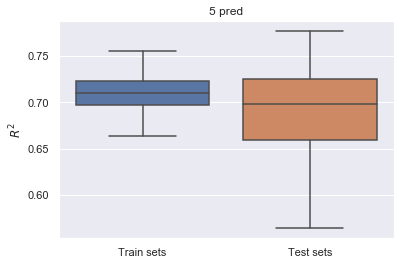

In [211]:
r2_train_5noint = []
r2_test_5noint = []
for i in range(100):
    data_train, data_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, random_state = i)
    fit = smf.ols(formula = 'MEDV ~ RM + LSTAT + NOX + DIS + PTRATIO', data = data_train).fit()
    x_train = data_train[['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]
    x_test = data_test[['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]
    pred_train = fit.predict(x_train)
    pred_test = fit.predict(x_test)
    r2_train_5noint.append(metrics.r2_score(y_train, pred_train))
    r2_test_5noint.append(metrics.r2_score(y_test, pred_test))
d = {'Train sets': r2_train_5noint, 'Test sets': r2_test_5noint}
plot_data = pd.DataFrame(data = d)
plot = sns.boxplot(data = plot_data, orient = 'v')
plot.set_title('5 pred')
plot.set(ylabel="$R^2$")

[Text(0, 0.5, '$R^2$')]

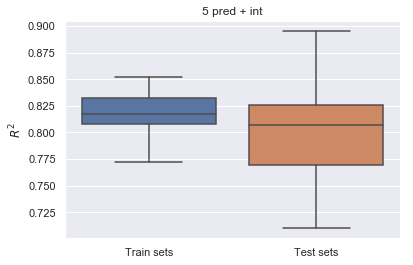

In [212]:
r2_train_5int = []
r2_test_5int = []
for i in range(100):
    data_train, data_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, random_state = i)
    fit = smf.ols(formula = 'MEDV ~ RM + NOX + DIS + PTRATIO + LSTAT + RM*(NOX + PTRATIO + LSTAT) + DIS*LSTAT + PTRATIO*LSTAT', data = data_train).fit()
    x_train = data_train[['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]
    x_test = data_test[['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]
    pred_train = fit.predict(x_train)
    pred_test = fit.predict(x_test)
    r2_train_5int.append(metrics.r2_score(y_train, pred_train))
    r2_test_5int.append(metrics.r2_score(y_test, pred_test))
d = {'Train sets': r2_train_5int, 'Test sets': r2_test_5int}
plot_data = pd.DataFrame(data = d)
plot = sns.boxplot(data = plot_data, orient = 'v')
plot.set_title('5 pred + int')
plot.set(ylabel="$R^2$")

[Text(0, 0.5, '$R^2$')]

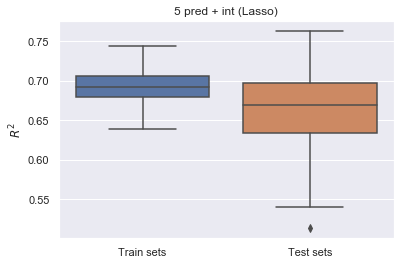

In [213]:
r2_train_5noint_lasso = []
r2_test_5noint_lasso = []
for i in range(100):
    data_train, data_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, random_state = i)
    fit = smf.ols(formula = 'MEDV ~ RM + NOX + CHAS + PTRATIO + LSTAT', data = data_train).fit()
    x_train = data_train[['NOX', 'RM', 'CHAS', 'PTRATIO', 'LSTAT']]
    x_test = data_test[['NOX', 'RM', 'CHAS', 'PTRATIO', 'LSTAT']]
    pred_train = fit.predict(x_train)
    pred_test = fit.predict(x_test)
    r2_train_5noint_lasso.append(metrics.r2_score(y_train, pred_train))
    r2_test_5noint_lasso.append(metrics.r2_score(y_test, pred_test))
d = {'Train sets': r2_train_5noint_lasso, 'Test sets': r2_test_5noint_lasso}
plot_data = pd.DataFrame(data = d)
plot = sns.boxplot(data = plot_data, orient = 'v')
plot.set_title('5 pred + int (Lasso)')
plot.set(ylabel="$R^2$")

[Text(0, 0.5, '$R^2$')]

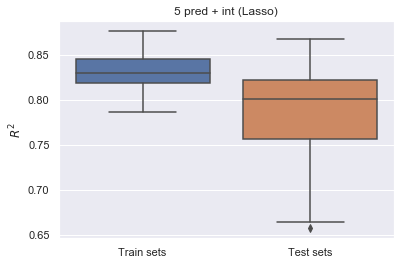

In [214]:
r2_train_5int_lasso = []
r2_test_5int_lasso = []
for i in range(100):
    data_train, data_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, random_state = i)
    fit = smf.ols(formula = 'MEDV ~ RM + NOX + PTRATIO + LSTAT + RM*(NOX + CHAS + PTRATIO + LSTAT) + NOX*(LSTAT) + CHAS*(PTRATIO + LSTAT) + PTRATIO*LSTAT ', data = data_train).fit()
    x_train = data_train[['NOX', 'RM', 'CHAS', 'PTRATIO', 'LSTAT']]
    x_test = data_test[['NOX', 'RM', 'CHAS', 'PTRATIO', 'LSTAT']]
    pred_train = fit.predict(x_train)
    pred_test = fit.predict(x_test)
    r2_train_5int_lasso.append(metrics.r2_score(y_train, pred_train))
    r2_test_5int_lasso.append(metrics.r2_score(y_test, pred_test))
d = {'Train sets': r2_train_5int_lasso, 'Test sets': r2_test_5int_lasso}
plot_data = pd.DataFrame(data = d)
plot = sns.boxplot(data = plot_data, orient = 'v')
plot.set_title('5 pred + int (Lasso)')
plot.set(ylabel="$R^2$")

Let us combine all this information into two plots:

[Text(0, 0.5, 'Train  $R^2$')]

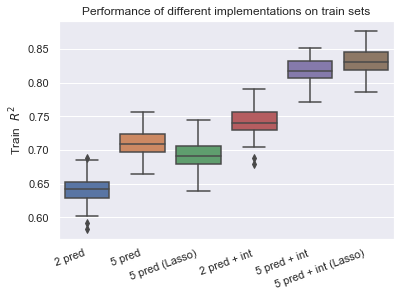

In [203]:
d_train = {'2 pred': r2_train_2noint, '5 pred': r2_train_5noint, '5 pred (Lasso)': r2_train_5noint_lasso, '2 pred + int': r2_train_2int, '5 pred + int': r2_train_5int, '5 pred + int (Lasso)': r2_train_5int_lasso}
data_train = pd.DataFrame(d_train)
plot = sns.boxplot(data = data_train, orient = 'v')
plot.set_xticklabels(plot.get_xticklabels(), rotation = 20, ha = "right")
plot.set_title('Performance of different implementations on train sets')
plot.set(ylabel="Train  $R^2$")

[Text(0, 0.5, 'Test  $R^2$')]

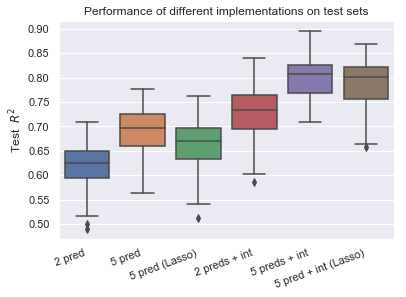

In [202]:
d_test = {'2 pred': r2_test_2noint, '5 pred': r2_test_5noint, '5 pred (Lasso)': r2_test_5noint_lasso, '2 preds + int': r2_test_2int, '5 preds + int': r2_test_5int, '5 pred + int (Lasso)': r2_test_5int_lasso}
data_test = pd.DataFrame(d_test)
plot = sns.boxplot(data = data_test, orient = 'v')
plot.set_xticklabels(plot.get_xticklabels(), rotation = 20, ha = "right")
plot.set_title('Performance of different implementations on test sets')
plot.set(ylabel="Test  $R^2$")

We can make the following observations, taking into account the performance on test sets: 

**(i)** the best linear model among the ones considered here contains 5 predictors with quadratic interactions between them, 

**(ii)** the reason is that this model shows less bias without displaying an increased variance,

**(iii)** Lasso regression is too biased for values of the penalty parameter that leaves only 5 predictors, and therefore performs worse that standard linear regression,

**(iv)** the linear model with 2 predictors and quadratic interactions among them performs better than the linear model with 5 predictors and no interactions; this strongly suggests that interactions are essential for a proper understanding of this dataset.

## 8. Linear regression with polynomial interactions: performance on test data

The last section shows explores linear regression with higher-order polynomials. Introducing an arbitrary power n of a linear combination of the 5 predictors RM, NOX, DIS, PTRATIO and LSTAT, we can see saturation of the goodness of the fit on training data for n=5. Hence, there is no need to go beyond this value. However, we also see that the performance of linear regression on the Boston dataset does not improve monotonically with the value of n, which illustrates the bias/variance tradeoff.

Let us start checking the statistical information of the linear regression with quintic interactions:

In [188]:
n = 5
fit = smf.ols(formula = 'MEDV ~ RM + NOX + DIS + PTRATIO + LSTAT + (RM + NOX + DIS + PTRATIO + LSTAT)**'+str(n), data = data).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     85.98
Date:                Wed, 05 Jun 2019   Prob (F-statistic):          3.10e-173
Time:                        10:38:27   Log-Likelihood:                -1361.9
No. Observations:                 506   AIC:                             2788.
Df Residuals:                     474   BIC:                             2923.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -412.1408    339.187     -1.215      0.225   -1078.637     254.355
RM                          87.1306     53.298      1.635      0.103     -17.599     191.860
NOX                        282.7519    563.859      0.501      0.616    -825.220    1390.724
DIS                         95.6581    111.987      0.854      0.393    -124.394     315.711
PTRATIO                     15.9918     18.727      0.854      0.394     -20.806      52.790
LSTAT                       35.6201     27.754      1.283      0.200     -18.915      90.156
RM:NOX                     -79.8406     89.446     -0.893      0.373    -255.601      95.920
RM:DIS                     -19.7398     17.311     -1.140      0.255     -53.755      14.275
RM:PTRATIO                  -3.5946      2.957     -1.216      0.225      -9.405       2.216
RM:LSTAT                    -6.1556      4.494     -1.370      0.171     -14.986       2.675
NOX:DIS                   -159.8438    258.004     -0.620      0.536    -666.817     347.130
NOX:PTRATIO                 -7.2028     31.212     -0.231      0.818     -68.533      54.128
NOX:LSTAT                  -42.9087     41.701     -1.029      0.304    -124.850      39.033
DIS:PTRATIO                 -6.0227      6.181     -0.974      0.330     -18.169       6.124
DIS:LSTAT                  -10.3851     10.078     -1.030      0.303     -30.189       9.419
PTRATIO:LSTAT               -1.5538      1.515     -1.025      0.306      -4.531       1.424
RM:NOX:DIS                  35.1653     39.934      0.881      0.379     -43.305     113.635
RM:NOX:PTRATIO               3.4029      4.978      0.684      0.495      -6.379      13.185
RM:NOX:LSTAT                 8.1754      6.836      1.196      0.232      -5.256      21.607
RM:DIS:PTRATIO               1.2631      0.965      1.309      0.191      -0.633       3.160
RM:DIS:LSTAT                 1.7771      1.614      1.101      0.272      -1.395       4.949
RM:PTRATIO:LSTAT             0.2819      0.247      1.141      0.254      -0.203       0.767
NOX:DIS:PTRATIO             10.6619     14.162      0.753      0.452     -17.167      38.491
NOX:DIS:LSTAT               20.3448     20.880      0.974      0.330     -20.684      61.373
NOX:PTRATIO:LSTAT            2.0227      2.315      0.874      0.383      -2.527       6.572
DIS:PTRATIO:LSTAT            0.6449      0.551      1.170      0.243      -0.438       1.728
RM:NOX:DIS:PTRATIO          -2.3788      2.214     -1.075      0.283      -6.728       1.971
RM:NOX:DIS:LSTAT            -3.5860      3.398     -1.055      0.292     -10.262       3.090
RM:NOX:PTRATIO:LSTAT        -0.4238      0.382     -1.111      0.267      -1.174       0.326
RM:DIS:PTRATIO:LSTAT        -0.1132      0.089     -1.277      0.202      -0.287       0.061
NOX:DIS:PTRATI

We see that the R^2 coefficient on the training data has increased, which may seem to imply that this is the best performing setting. However, we have to be careful and check the performance of different interaction terms on test sets:

Text(0, 0.5, '$R^2$')

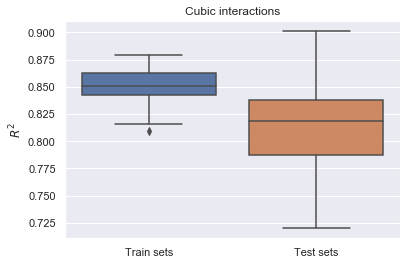

In [208]:
r2_train_cubic = []
r2_test_cubic = []
n = 3
for i in range(100):
    data_train, data_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, random_state = i)
    fit = smf.ols(formula = 'MEDV ~ RM + NOX + DIS + PTRATIO + LSTAT + (RM + NOX + DIS + PTRATIO + LSTAT)**'+str(n), data = data_train).fit()
    x_train = data_train[['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]
    x_test = data_test[['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]
    pred_train = fit.predict(x_train)
    pred_test = fit.predict(x_test)
    r2_train_cubic.append(metrics.explained_variance_score(y_train, pred_train))
    r2_test_cubic.append(metrics.explained_variance_score(y_test, pred_test))
d = {'Train sets': r2_train_cubic, 'Test sets': r2_test_cubic}
plot_data = pd.DataFrame(data = d)
plot = sns.boxplot(data = plot_data, orient = 'v')
plot.set_title('Cubic interactions')
plot.set_ylabel("$R^2$")

Text(0, 0.5, '$R^2$')

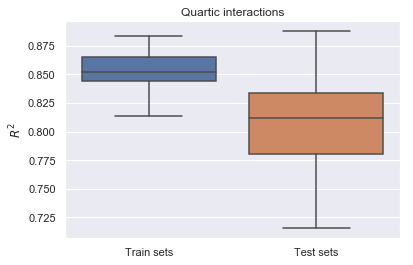

In [207]:
r2_train_quartic = []
r2_test_quartic = []
n = 4
for i in range(100):
    data_train, data_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, random_state = i)
    fit = smf.ols(formula = 'MEDV ~ RM + NOX + DIS + PTRATIO + LSTAT + (RM + NOX + DIS + PTRATIO + LSTAT)**'+str(n), data = data_train).fit()
    x_train = data_train[['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]
    x_test = data_test[['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]
    pred_train = fit.predict(x_train)
    pred_test = fit.predict(x_test)
    r2_train_quartic.append(metrics.explained_variance_score(y_train, pred_train))
    r2_test_quartic.append(metrics.explained_variance_score(y_test, pred_test))
d = {'Train sets': r2_train_quartic, 'Test sets': r2_test_quartic}
plot_data = pd.DataFrame(data = d)
plot = sns.boxplot(data = plot_data, orient = 'v')
plot.set_title('Quartic interactions')
plot.set_ylabel('$R^2$')

Text(0, 0.5, '$R^2$')

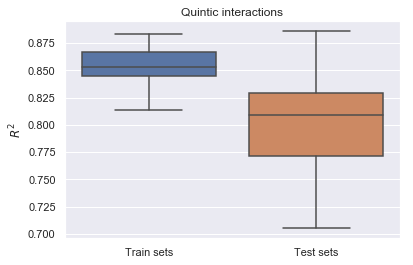

In [206]:
r2_train_quintic = []
r2_test_quintic = []
n = 5
for i in range(100):
    data_train, data_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, random_state = i)
    fit = smf.ols(formula = 'MEDV ~ RM + NOX + DIS + PTRATIO + LSTAT + (RM + NOX + DIS + PTRATIO + LSTAT)**'+str(n), data = data_train).fit()
    x_train = data_train[['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]
    x_test = data_test[['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']]
    pred_train = fit.predict(x_train)
    pred_test = fit.predict(x_test)
    r2_train_quintic.append(metrics.explained_variance_score(y_train, pred_train))
    r2_test_quintic.append(metrics.explained_variance_score(y_test, pred_test))
d = {'Train sets': r2_train_quintic, 'Test sets': r2_test_quintic}
plot_data = pd.DataFrame(data = d)
plot = sns.boxplot(data = plot_data, orient = 'v')
plot.set_title('Quintic interactions')
plot.set_ylabel('$R^2$')

In order to illustrate more clearly the behavior of R^2 on training data, let us consider a further plot:

Text(0, 0.5, 'Train  $R^2$')

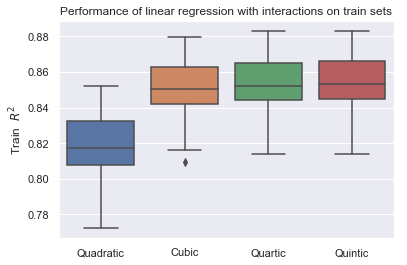

In [201]:
d = {'Quadratic' : r2_train_5int, 'Cubic': r2_train_cubic, 'Quartic': r2_train_quartic, 'Quintic': r2_train_quintic}
plot_data = pd.DataFrame(d)
plot = sns.boxplot(data = plot_data, orient = 'v')
plot.set_title('Performance of linear regression with interactions on train sets')
plot.set_ylabel('Train  $R^2$')

Moreover, we have seen above that the R^2 on the test data is systematically below the R^2 on the training data. But we want to understand the change in this quantity depending on the value of n:

Text(0, 0.5, 'Test  $R^2$')

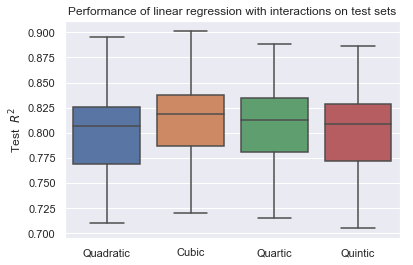

In [199]:
d = {'Quadratic' : r2_test_5int, 'Cubic': r2_test_cubic, 'Quartic': r2_test_quartic, 'Quintic': r2_test_quintic}
plot_data = pd.DataFrame(d)
plot = sns.boxplot(data = plot_data, orient = 'v')
plot.set_title('Performance of linear regression with interactions on test sets')
plot.set_ylabel('Test  $R^2$')

This plot is a clear illustration of **overfitting**: the higher the value of n, the more flexible the linear model is. This decreases the bias due to the selection of a particular functional relation between the predictors and the target variable. On the other hand, this increases the variance due to the greater flexibility. For n=3, the variance decreases more than the variance increases from respect to n=2. However, this is no longer true for n=4 and n=5, as the overall performance (that takes into account both effects) decreases.

We can see an even more extreme situation of overfitting, if which we consider cubic interactions but taking into account all the predictors (which is enough to illustrate our point):

Text(0, 0.5, 'Train  $R^2$')

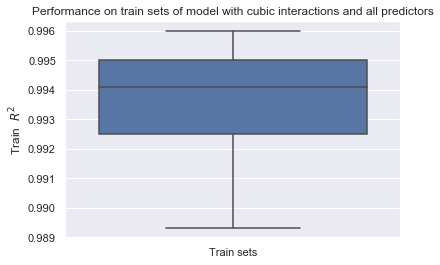

In [218]:
r2_train_quintic = []
r2_test_quintic = []
n = 3
for i in range(20):
    data_train, data_test, y_train, y_test = train_test_split(data, y, test_size = 0.3, random_state = i)
    fit = smf.ols(formula = 'MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + (CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT)**'+str(n), data = data_train).fit()
    x_train = data_train[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
    x_test = data_test[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
    pred_train = fit.predict(x_train)
    pred_test = fit.predict(x_test)
    r2_train_quintic.append(metrics.explained_variance_score(y_train, pred_train))
    r2_test_quintic.append(metrics.explained_variance_score(y_test, pred_test))
d = {'Train sets': r2_train_quintic}
plot_data = pd.DataFrame(data = d)
plot = sns.boxplot(data = plot_data, orient = 'v')
plot.set_title('Performance on train sets of model with cubic interactions and all predictors')
plot.set_ylabel('Train  $R^2$')

The values of R^2 on training data seem excellent. However, the performance of the algorithm on test data is catastrophic:

Text(0, 0.5, 'Test  $R^2$')

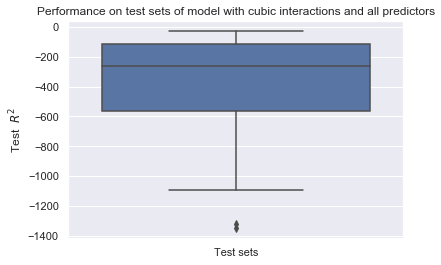

In [217]:
d = {'Test sets': r2_test_quintic}
plot_data = pd.DataFrame(data = d)
plot = sns.boxplot(data = plot_data, orient = 'v')
plot.set_title('Performance on test sets of model with cubic interactions and all predictors')
plot.set_ylabel('Test  $R^2$')

This is a very clear illustration of overfitting: the decrease in bias due to the addition of cubic interactions involving all 13 predictors is not enough to compensate the corresponding large increase in variance. This leads to a dramatic increase of R^2 on test sets.

## Conclusions

This concludes our analysis of the Boston dataset using linear regression. We have shown how to reduce the number of predictors in order to work only with the most relevant ones, and how to predict with about 80% of accuracy the median price of a given property depending on the values of these selected predictors. We have presented a detailed discussion of models that are linear in the predictors, interactions, and Lasso regression. Moreover, we have used the same techniques in order to illustrate basic issues such as the bias/variance tradeoff and overfitting.